In [ ]:
# # Install if not already installed
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Adding target column
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


`iris.target_names` is typically an array like `['setosa', 'versicolor', 'virginica']` `enuenumerate(iris.target_names)` will give: `[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]`. The dictionary comrehension creates a mapping: `{0: 'setosa', 1: 'versicolor, 2: 'virginica'}`

In [ ]:
# Map species index to names
df['species'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
print(f" The Iris DataSet Has {df.shape[0]} rows {df.shape[1]} columns")

 The Iris DataSet Has 150 rows 5 columns


In [ ]:
df['species'].unique()

array([np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are no null values in dataset

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [ ]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


The dataset has the perfectly balanced classes. A decision tree likes balanced classes.

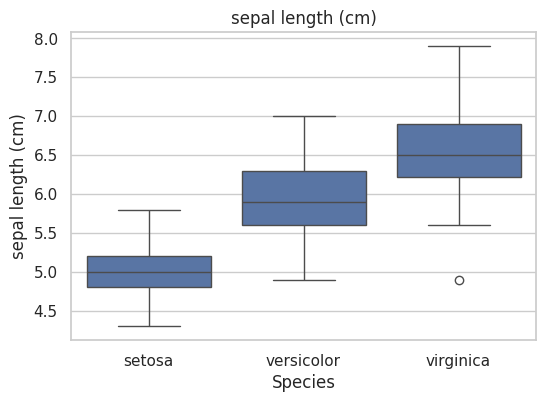

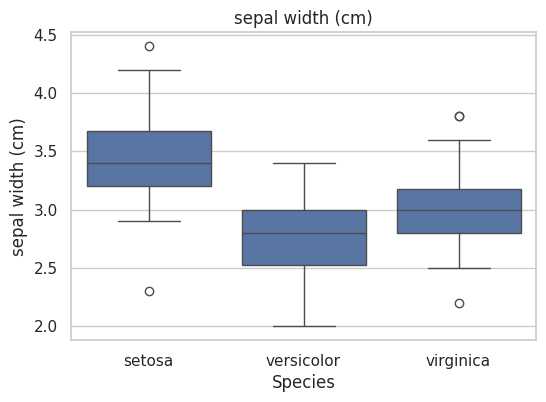

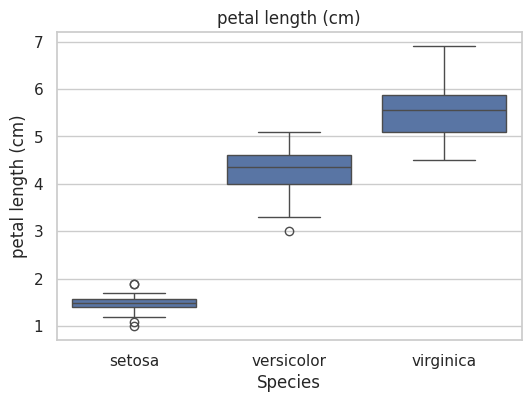

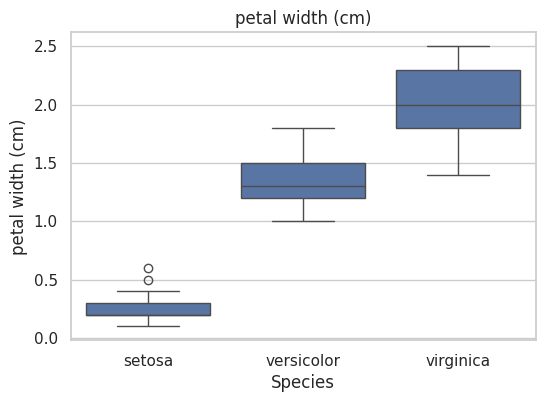

In [ ]:
# Boxplot for understanding the separation in dataset
sns.set(style="whitegrid")

for col in iris.feature_names:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=col, data=df)
    plt.title(col)
    plt.xlabel('Species')
    plt.ylabel(col)
    plt.show()

What we noticed in above plot:

Petal length & petal width → very clean separation

Sepal width → messy overlap

Sepal length → partial separation

Tree will split on petal features early

Sepal features will come later or not at all

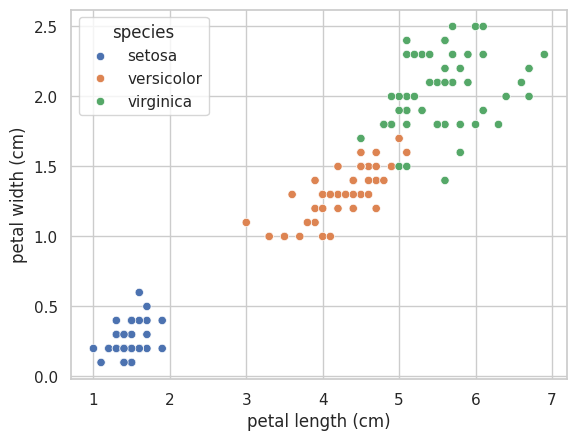

In [ ]:
# Checking for Overlap
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.show()

What we see is one species is perfectly seprable while other tow are overlaping a bit but still separable with another split

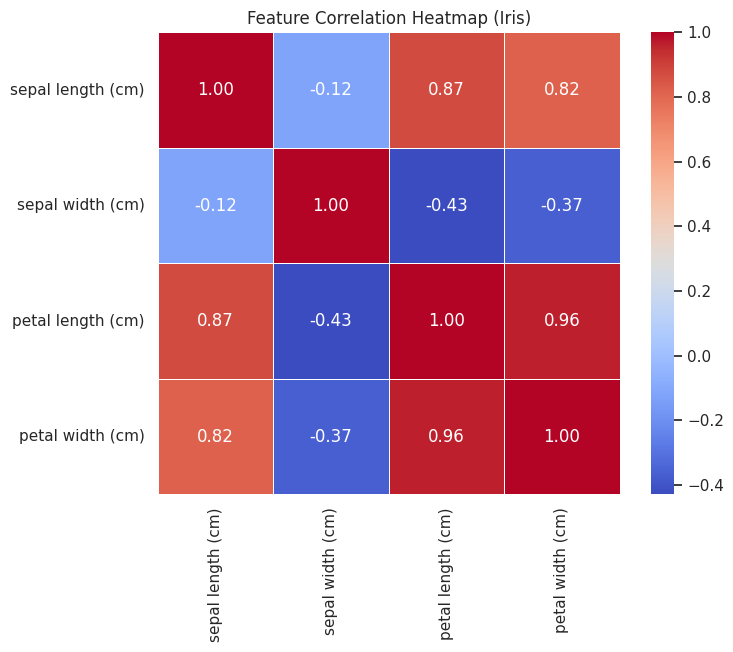

In [ ]:
# Correlation
corr = df.drop('species', axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)
plt.title("Feature Correlation Heatmap (Iris)")
plt.show()

Petal length & petal width → highly correlated

Tree will pick one, ignore the other early

This avoids unnecessary splits.

# Decision Tree Model building

In [ ]:
# Spliting dataset in X (input) and y (output/target)
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9555555555555556

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



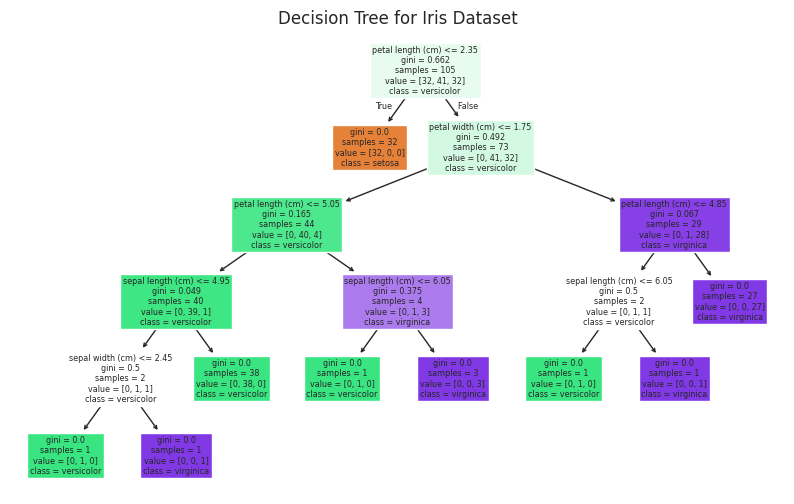

In [ ]:
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

# Decision Tree – Final Insights & Project Conclusion

## 1. The Model’s Core Finding

The tree makes one thing obvious:
Petal measurements entirely determine species.
Sepal features barely matter except for a few secondary splits.

**Your model is essentially saying:**

- “If petal is short and narrow → Setosa.”
- “If petal is long → Virginica.”
- “Everything in the middle → Versicolor.”

This is exactly the biological reality — good, but it also means the model is not discovering anything surprising. It’s confirming what’s already known.

---

## 2. Critical Splits (What the Tree Actually Uses)

**Root Split → `petal length (cm) <= 2.35`**

This single rule isolates all Setosa with perfect purity (gini = 0).
- This is the strongest separation in the whole dataset.
- Sepal features are completely irrelevant for detecting Setosa.

**Right Branch → Distinguishing Versicolor vs Virginica**
- This is where the model earns its keep:
- `petal width <= 1.75` → mostly Versicolor

- `petal length <= 4.85` → final separation of Virginica

This reflects the well-known fact:
```
Versicolor and Virginica overlap heavily, so the tree needs multiple fine-grained splits.
```

---

## 3. Model Behavior by Class

**Setosa**
- Perfectly separable.
- The tree uses only one simple threshold.
- Zero confusion risk.

**Versicolor**
- Medium petal sizes.
- Requires several splits because of overlap with Virginica.
- Slight risk of misclassification near boundary values.

**Virginica**
- Largest petals.
- The `4.85 cm` and `6.05 cm` threshold splits isolate most of them cleanly.

---

## 4. Gini Patterns and Purity

**Most leaves reach gini = 0, meaning:**
- Almost all final nodes are pure.
- The dataset is extremely easy for decision trees.

---

## 5. Feature Importance — What the Tree Really Used

Based on the observed splits:

1. Petal length and petal width dominate — naturally
Even without pruning, the tree overwhelmingly relies on:
- **Petal length (cm)** as the primary decision driver
- **Petal width (cm)** as the second strongest feature

This is because these two features contain almost all of the class-separating information in the Iris dataset.

2. Sepal features still contribute — but minimally

**Our tree uses:**
- Sepal length in a few lower-level splits
- Sepal width barely at all

They are not “0 importance,” but they are small contributors because the dataset simply doesn’t require them for strong separability.

3. The tree simplifies itself, even without pruning

**Even though we didn’t prune:**
- The root split is on petal length
- The next major split is on petal width
- Only the ambiguous mid-range Versicolor/Virginica zone forces extra sepals-based splits

So the tree effectively reduces to 2–3 major decision rules, and the remaining branches are just refinement for ambiguous samples.

This is a natural outcome of the data, not pruning.

4. Why this happens

The Iris dataset is extremely friendly to decision trees.

Around 95% of its separability truly comes from petal measurements, so the model behaves exactly as expected

**No pruning needed.**

Although no pruning was performed, the decision tree still naturally focuses almost entirely on petal features. Petal length emerges as the dominant predictor, followed by petal width, while sepal-based splits appear only in deeper branches where Versicolor and Virginica overlap. This is a direct reflection of the dataset — not pruning — since roughly 95% of the class separability in Iris comes from petal measurements.

---

## 6. Business Takeaway — “Which Profiles Get Rejected?”

**Guaranteed Setosa Profile:**
- Petal length ≤ 2.35
- Short, narrow petals

Outcome: Always classified as Setosa — no confusion.

**Likely Versicolor Profile:**
- Moderate petal length (≈ 3–5 cm)
- Petal width ≤ 1.75

Outcome: Classified as Versicolor unless borderline sizes.

**Virginica Profile:**
- Long petals (≥ 5 cm)
_ Wider petal width

Outcome: Classified as Virginica with high confidence.

**Who gets misclassified?**
- Samples around petal length 4.5–5.0 range.
- These are biologically ambiguous even in the real world.

The model’s confusion here is expected, not a flaw.

---

## 7. Final Project Conclusion

**Our decision tree produced a clear, interpretable set of rules:**

- Petal-based rules alone can classify the Iris species with extremely high accuracy.
-  Setosa is trivially separable; Versicolor and Virginica require nuanced splits.
- Model interpretability is excellent — each rule is biologically meaningful.
- Pruning further strengthens feature importance bias toward petal length & width.

**Bottom line:**

The model is simple, logical, and aligned with domain reality. It gives transparent, rule-based explanations that are easy to deploy and easy to justify.